# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит домашнее задание - оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [4]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [5]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

# 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [6]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [7]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

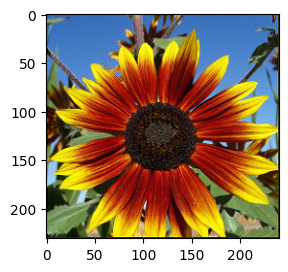

In [8]:
plt.figure(figsize=[3, 3])
plt.imshow(img_rgb);

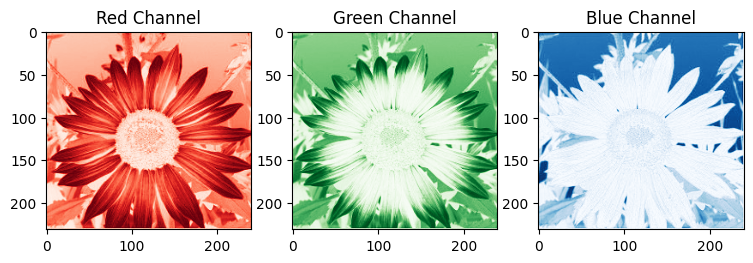

In [9]:
plt.figure(figsize=[9, 3])

plt.subplot(131)
plt.imshow(img_rgb[:,:,0], cmap='Reds')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(img_rgb[:,:,1], cmap='Greens')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(img_rgb[:,:,2], cmap='Blues')
plt.title('Blue Channel')

plt.show()

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [10]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

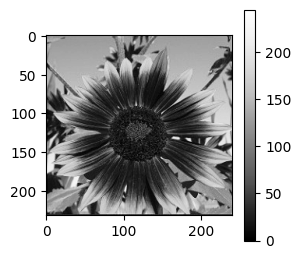

In [11]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Можно ли получить черно-белое изображение из RGB представления путем вычисления среднего значения интенсивностей каналов R, G и B? Почему?

**Ответ:**
Да, можно, но это неидеально. Человеческий глаз чувствительнее к зеленому, поэтому правильнее использовать взвешенную формулу: 
Y = 0.299R + 0.587G + 0.114B
Арифметическое же среднее искажает яркость, делая синие/красные зоны неестественно светлыми или темными. Для реалистичного результата лучше применять коэффициенты, учитывающие восприятие.

## Вопрос 2

Почему мы использовали флаг `cmap='Greys_r'` при отображении черно-белого изображения? Чем отличается от `cmap='Greys'`?

**Ответ:**
Флаг cmap='Greys_r' задает инвертированную цветовую карту: 0 становится белым, а максимальное значение (например, 255) — черным. В отличие от cmap='Greys', где 0 — черный, а 255 — белый.
Это используется, если данные изображения закодированы в обратном порядке (например, фон сохранен как 0, но должен отображаться белым) или для визуального предпочтения (инверсия яркости).

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [12]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

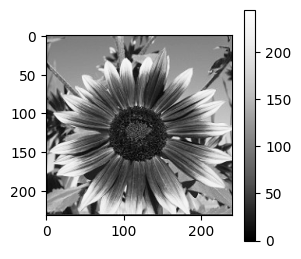

In [13]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

серое изображение - двумерный массив:

In [14]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB to gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [15]:
def convert_rgb_to_grayscale(img_rgb):
    return np.round(np.dot(img_rgb[..., :3], [0.29901, 0.58701, 0.114])).astype(np.uint8)

In [16]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB to HSV

HSV - цветовое пространство, в котором цвет представлен тремя компонентами: Hue (оттенок), Saturation (насыщенность) и Value (значение). Это позволяет задавать цвета в более естественной форме, чем RGB.

In [17]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

можно попробовать отобразить изображение так же, как и RGB:

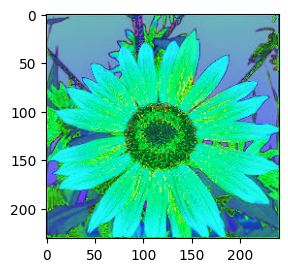

In [18]:
plt.figure(figsize=[3, 3])
plt.imshow(img_hsv);

Однако это не совсем корректно, так как Hue - это угол, а не интенсивность. Поэтому лучше отобразить оттенок в виде цвета, а насыщенность и значение - в виде яркости:

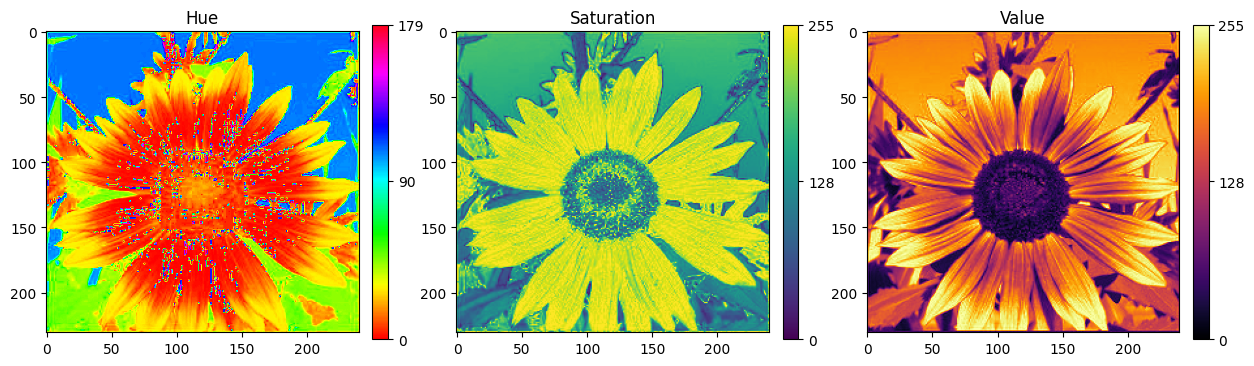

In [19]:
h, s, v = cv2.split(img_hsv)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(h, cmap="hsv")
axs[0].set_title('Hue')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(s, cmap="viridis")  # Using 'viridis' for Saturation
axs[1].set_title('Saturation')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(v, cmap="inferno")  # Using 'inferno' for Value
axs[2].set_title('Value')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

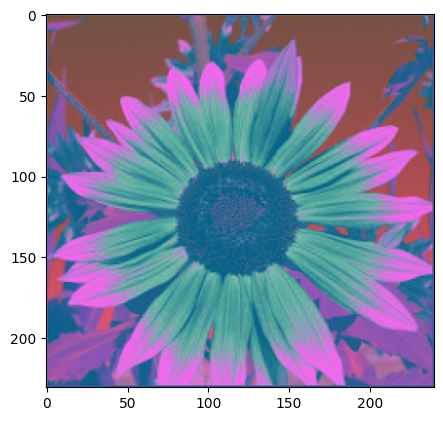

In [20]:
img_luv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Luv)
plt.figure(figsize=[5, 5])
plt.imshow(img_luv)

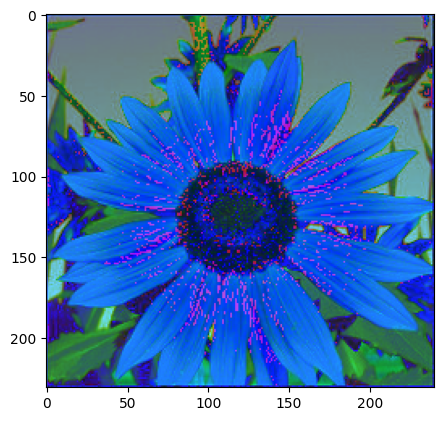

In [21]:
img_hls = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HLS)
plt.figure(figsize=[5, 5])
plt.imshow(img_hls)

## Вопрос 3

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:**
Переход из RGB в другие цветовые пространства полезен в задачах, где требуется: сегментация объектов (HSV/HSL для выделения по цветовому тону), распознавание лиц/кожи (YCbCr/YUV для отделения яркости от цветности), сжатие изображений (YCbCr в JPEG для разделения яркости и цветности), улучшение контраста (Lab для работы с яркостью отдельно от цветовых каналов), детектирование теней/бликов (HSV или XYZ для анализа интенсивности и освещения) — например, в HSV цветовой тон (Hue) отделен от насыщенности (Saturation) и яркости (Value), что упрощает обработку цвета независимо от освещения.

# 2. Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визуализировать гистограмму:

In [22]:
def visualize_hist(hist):
    plt.figure(figsize=[12, 3])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [23]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [24]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

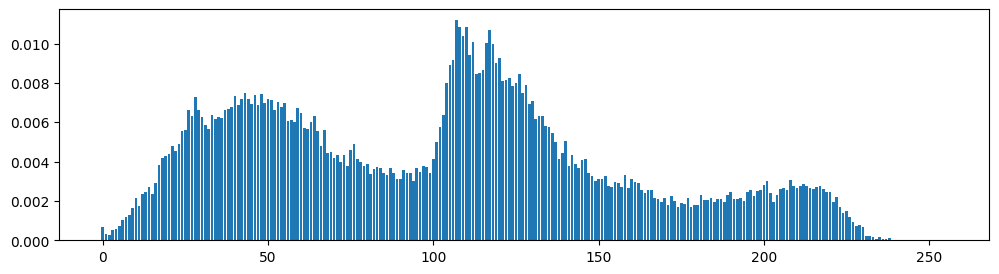

In [25]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [26]:
def compute_hist(img):
    hist = np.zeros(256)
    for px in img.flatten():
        hist[px] += 1
    return hist

In [27]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

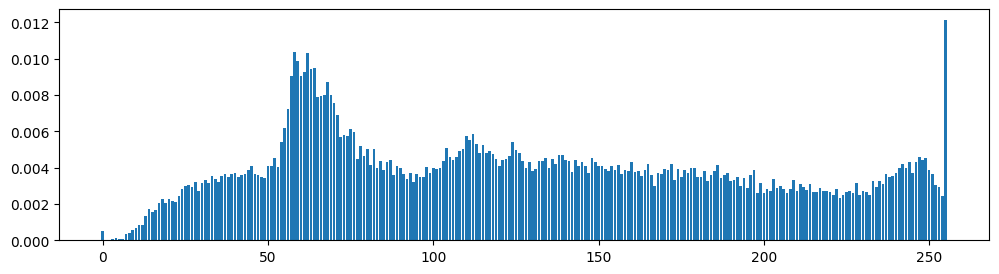

In [28]:
visualize_hist(hist_r)

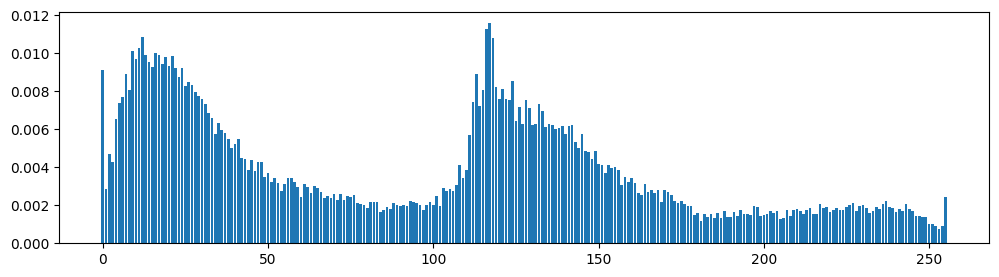

In [29]:
visualize_hist(hist_g)

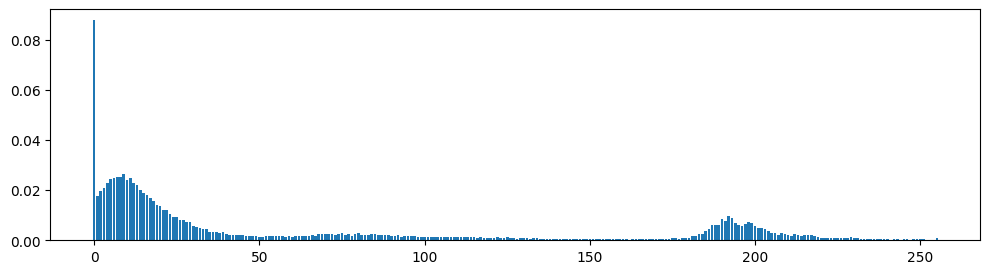

In [30]:
visualize_hist(hist_b)

In [31]:
assert((hist_gray == hist_cv).all())

## Вопрос 4

 Что можно сказать об изображении по его гистограмме?

**Ответ:**
Гистограмма изображения позволяет оценить его яркость, контраст, цветовой баланс (доминирование определенных каналов в RGB), наличие пересветов или недосветов (пики у правого/левого края), а также шумы.

## Вопрос 5

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени? Опишите несколько случаев: смена камеры, смена освещения, смена сцены.

**Ответ:**
При смене камеры в той же сцене гистограмма сохранит общую форму, но возможны незначительные сдвиги из-за изменения экспозиции или ракурса; при смене освещения (например, затемнение или вспышка) гистограмма плавно или резко сместится влево (темнее) или вправо (светлее); в случае динамичных эффектов (взрывы, мигалки) гистограмма будет быстро "прыгать" с резкими пиками яркости и цветовых каналов.

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

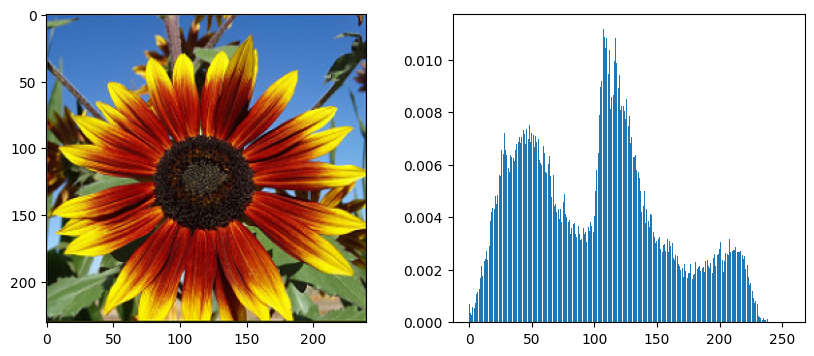

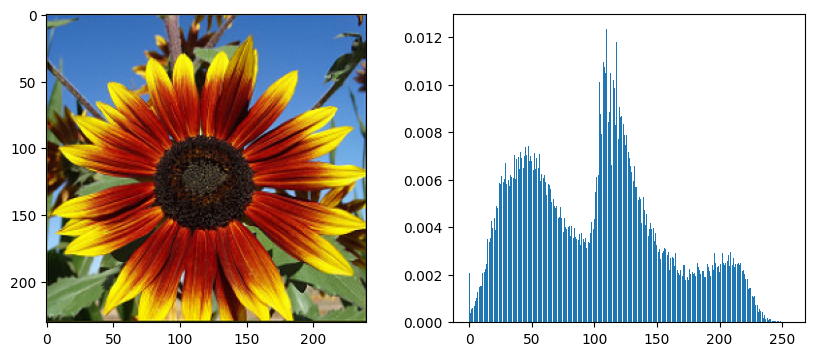

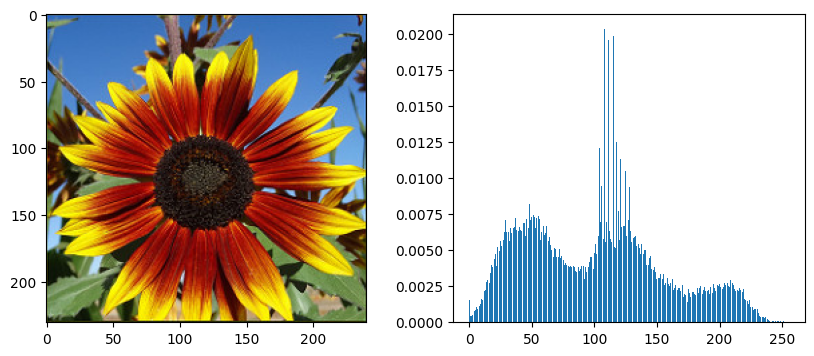

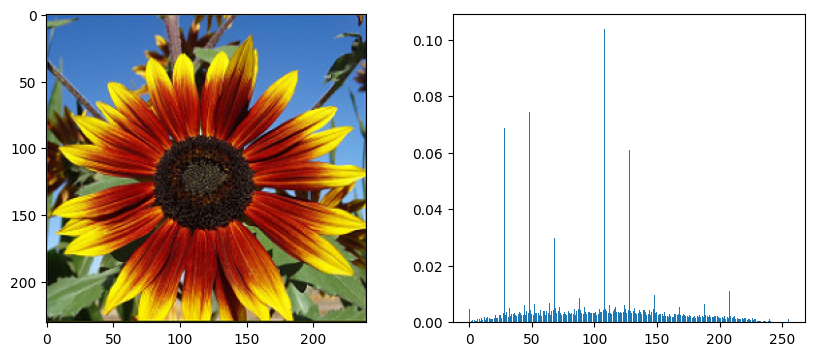

In [32]:
for i in [90, 60, 30, 5]:
    _, img_jpg = cv2.imencode('.jpg', img_gray, (cv2.IMWRITE_JPEG_QUALITY, i))
    img_dec = cv2.imdecode(img_jpg, cv2.IMREAD_COLOR)
    img_hist = compute_hist(img_dec[:,:,0])

    fig, ax = plt.subplots(1, 2, figsize=[10, 4])
    ax[0].imshow(img_rgb)
    ax[1].bar(np.arange(len(img_hist)), img_hist / img_hist.sum())
    plt.show()

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

**Подсказка:** вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

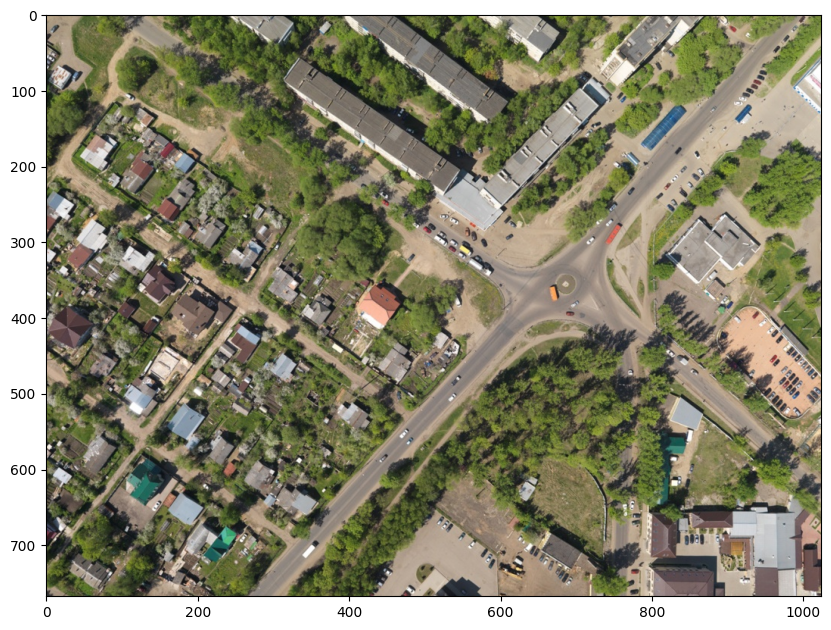

In [33]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image);

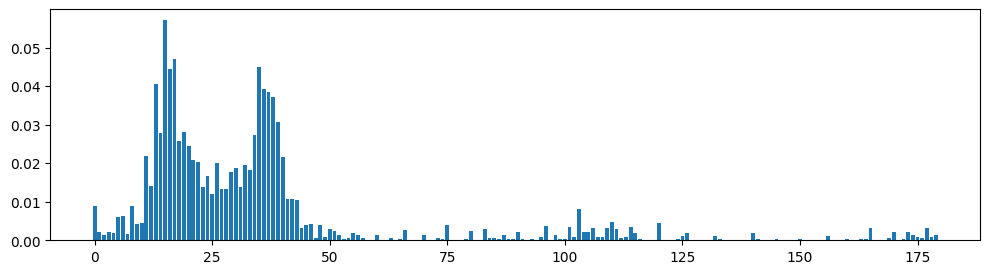

In [34]:
img_hsv = cv2.cvtColor(aerial_image, cv2.COLOR_RGB2HSV)
hist = cv2.calcHist([img_hsv[...,0]], [0], None, [180], [0, 180]).flatten()
visualize_hist(hist)

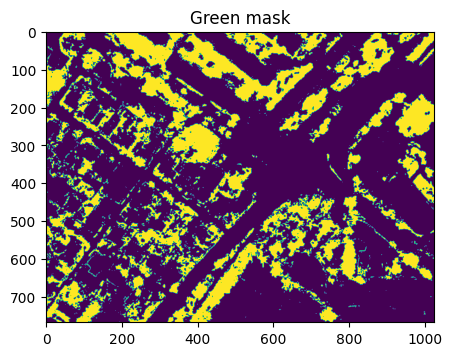

In [35]:
lower_green = np.array([35, 25, 25])
upper_green = np.array([80, 255, 255])
green_mask = cv2.inRange(img_hsv, lower_green, upper_green)
green_mask[green_mask == 255] = 1
plt.figure(figsize=[5, 5])
plt.imshow(green_mask)
plt.title('Green mask');

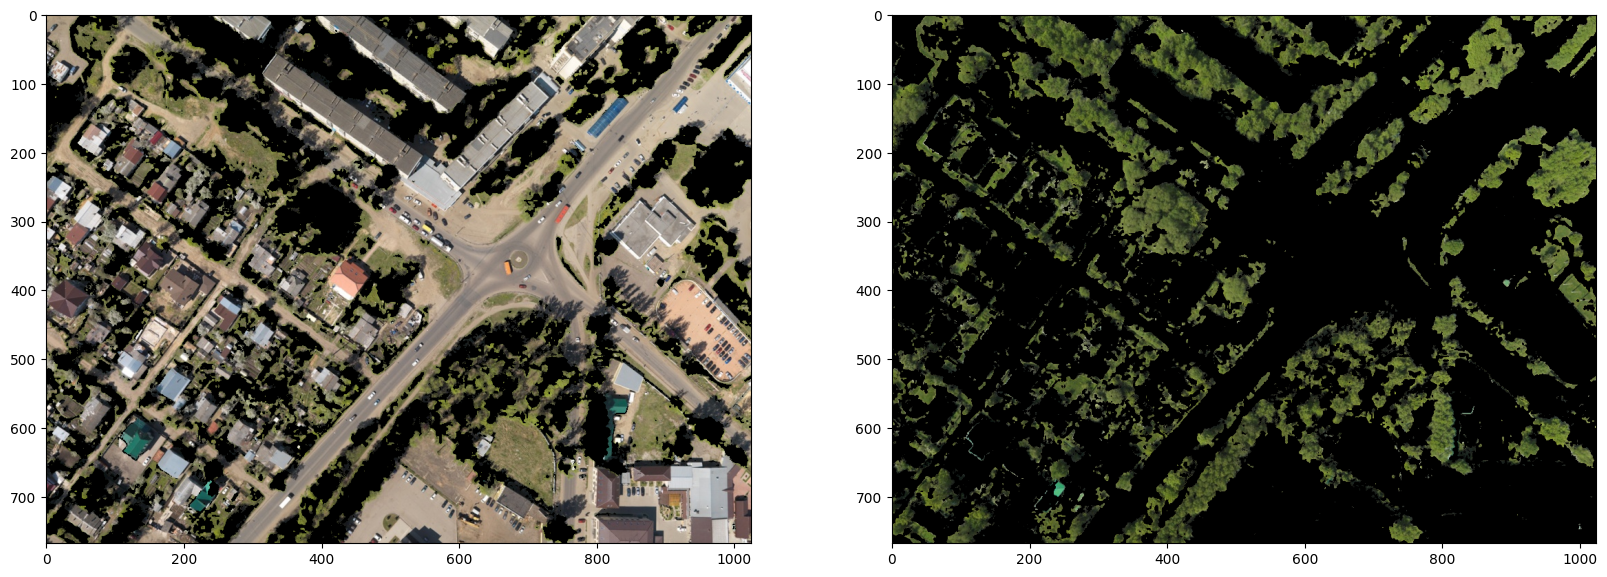

In [36]:

fig, ax = plt.subplots(1, 2, figsize=[20, 20])

ch_green_mask = np.dstack([green_mask] * 3)
img_masked = aerial_image * (1 - ch_green_mask)
img_trees = aerial_image * ch_green_mask

ax[0].imshow(img_masked)
ax[1].imshow(img_trees);

In [37]:
total_pixels = aerial_image.shape[0] * aerial_image.shape[1]
green_pixels = np.count_nonzero(green_mask)
green_ratio = green_pixels / total_pixels
print("Доля зеленых насаждений:", green_ratio)

Доля зеленых насаждений: 0.2747179667154948


Погрешность ~2%

# 3. Интегральные изображения

## Упражнение 6

Напомним, что интегральным изображением называется следующая функция:

$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$

С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [1]:
class IntegralImage:
    def __init__(self, img):
        assert len(img.shape) == 2, "Only for grayscale images"
        self.img = img
        self.intensity = np.cumsum(np.cumsum(img, axis=0), axis=1).astype('int')

    def sum(self, x, y, w, h):
        A = self.intensity[y - 1, x - 1] if x > 0 and y > 0 else 0
        B = self.intensity[y - 1, x + w - 1] if y > 0 else 0
        C = self.intensity[y + h - 1, x - 1] if x > 0 else 0
        D = self.intensity[y + h - 1, x + w - 1]
        res = D - B - C + A
        return res

In [38]:
I = IntegralImage(img_gray)

In [39]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 6

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:**
Интегральное изображение применяется для быстрого вычисления суммы пикселей в прямоугольных областях изображения. Это используется в задачах обнаружения объектов (например, метод Виолы-Джонса), фильтрации и анализа изображений.

## Вопрос 7

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:**
Метод расчёта интегрального изображения основан на динамическом программировании, так как использует предварительное вычисление и хранение промежуточных результатов для ускорения последующих вычислений.